# K-means clustering using the iris dataset

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx



## Importing libraries

In [36]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [37]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "datasets/iris/iris.csv"

# Load the dataset from HHDD
df  = pd.read_csv(url, header = None, names = colnames )

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encoding the class label and remove one of the classes

Encoding the class label and remove one of the classes


In [38]:
# Encoding the class label categorical column: from string to num
df = df.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

# NOTE: doing kmeans with sklearn requieres to use the clusters ID from 0

# Visualize the dataset
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric

Remove all observations from one of the classes

In [39]:
# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
#Label2Remove = 3 # (1,2,3)
#df = df[df.Flower!=Label2Remove]
#df

# NOTE: comment this if cell if you want to use the three classes


Scatter plot of the data

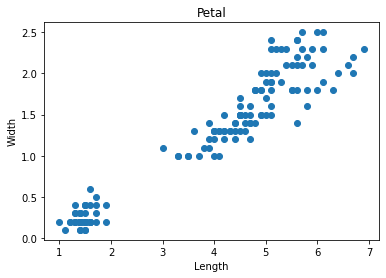

In [40]:
# Scatter plot of the data
plt.scatter(df.Petal_Length,df.Petal_Width)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()


It seem that the Petal length and width form two cluster, however, we know in advance that there are three classes ¡¡

Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

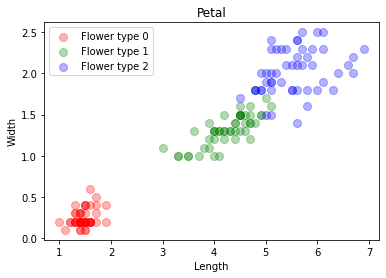

In [42]:
# Get dataframes for each real cluster
df1 = df[df.Flower==0]
df2 = df[df.Flower==1]
df3 = df[df.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

## Kmeans clustering using sklearn

Kmeans clustering using sklearn

In [43]:
# Import library
from sklearn.cluster import KMeans

# Create model
km1         = KMeans(n_clusters=3)

# Do K-means clustering
ypredicted1 = km1.fit_predict(df[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataset
ypredicted1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
df.Flower.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [ ]:
# Manual pairing the labels of the real and estimated clusters
ypredicted1new = np.choose(ypredicted1, [0, 2, 1]).astype(int)
ypredicted1new


In [45]:
# Automatic pairing the labels of the real and estimated clusters: WORK IN PROGRESS

# Import library
# from sklearn.metrics.pairwise import pairwise_distances_argmin

# Centroides of the real clusters
#real_cluster_centers  = 

# Centroides of the estimated clusters
#esti_cluster_centers  = km2.cluster_centers_

# Compute order for the estimated clusters
#order = pairwise_distances_argmin(real_cluster_centers, esti_cluster_centers )

# Get ordered estimated clusters
#esti_cluster_centers = esti_cluster_centers[order]

# Get paired labels
#real_cluster_labels = pairwise_distances_argmin(X, real_cluster_centers)
#esti_cluster_lables = pairwise_distances_argmin(X, esti_cluster_centers)


# NOTE: Use info in https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#establishing-parity-between-clusters

In [46]:
# Add a new column to the dataset with the cluster information
df['Cluster1'] = ypredicted1new

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [47]:
# Laber of the estimated clusters
df.Cluster1.unique()


array([0, 1, 2])

In [48]:
# Cluster centroides
km1.cluster_centers_

# NOTE: centroides also need to be paired


array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [49]:
# Sum of squared error (sse) of the final model
km1.inertia_


31.371358974358966

In [ ]:
# The number of iterations required to converge
km1.n_iter_


## Plot estimated clusters

Plot estimated clusters

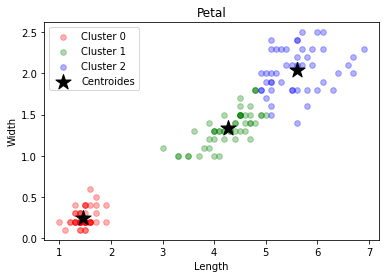

In [50]:
# Get dataframes for each estimated cluster
df1 = df[df.Cluster1==0]
df2 = df[df.Cluster1==1]
df3 = df[df.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


## Plot both real and estimated clusters to check for errors

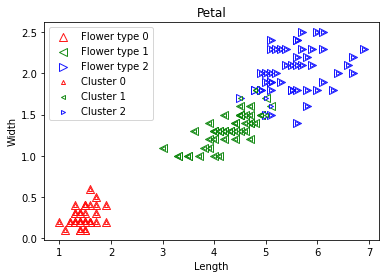

In [51]:
# Get dataframes for each real cluster
df1 = df[df.Flower==0]
df2 = df[df.Flower==1]
df3 = df[df.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Flower type 0', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Flower type 1', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Flower type 2', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

# Get dataframes for each estimated cluster
df1 = df[df.Cluster1==0]
df2 = df[df.Cluster1==1]
df3 = df[df.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Cluster 0',      c='white', edgecolor='r', marker='^', s=16, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Cluster 1',      c='white', edgecolor='g', marker='<', s=16, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Cluster 2',      c='white', edgecolor='b', marker='>', s=16, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

#plt.xlim(4,6)
#plt.ylim(1,2)

plt.show()


## Compute performance


## Selecting K: elbow plot

Selecting the number of clusters **k** using the elbow method

In [16]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k)
    # Do K-means clustering
    km.fit_predict(df[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)


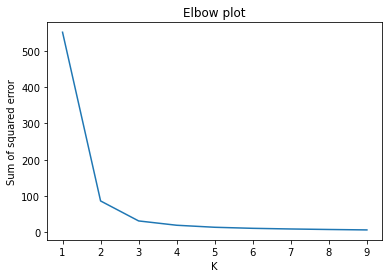

In [17]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


Choose the k after which the sse is minimally reduced

## Selecting K: Silhouette Coefficient

Selecting the number of clusters **k** using the silhouette coefficient

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
# Intialize a list to hold silhouette coefficients
silhouette_coefficients = []

# Define values of k
k_rng = range(1,10)

# Parametrs
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

# For each k
for k in k_rng:
    # Create model
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    # Do K-means clustering
    kmeans.fit_predict(df[['Petal_Length','Petal_Width']])
    # Compute silhouette coefficient
    score = silhouette_score(df[['Petal_Length','Petal_Width']], kmeans.labels_)
    # Save silhouette coefficient for each k
    silhouette_coefficients.append(score)

In [ ]:
# Plot silhouette coefficient versus k
plt.plot(k_rng,silhouette_coefficients)

plt.title('Silhouette Coefficients')
plt.xlabel('K')
plt.ylabel('silhouette_coefficients')
plt.show()


## Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [18]:
# Import library
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()


In [19]:
# Scale data
scaler.fit(df[['Petal_Length']])
df['Petal_Length_Scaled'] = scaler.transform(df[['Petal_Length']])

scaler.fit(df[['Petal_Width']])
df['Petal_Width_Scaled'] = scaler.transform(df[['Petal_Width']])

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1,Petal_Length_Scaled,Petal_Width_Scaled
0,5.1,3.5,1.4,0.2,0,0,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0,0,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0,0,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0,0,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0,0,0.067797,0.041667
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,0.711864,0.916667
146,6.3,2.5,5.0,1.9,2,1,0.677966,0.750000
147,6.5,3.0,5.2,2.0,2,1,0.711864,0.791667
148,6.2,3.4,5.4,2.3,2,1,0.745763,0.916667


In [20]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1,Petal_Length_Scaled,Petal_Width_Scaled
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,1.013333,0.467458,0.458056
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.827276,0.299203,0.317599
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.101695,0.083333
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000,0.567797,0.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000,0.694915,0.708333
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000,1.000000,1.000000


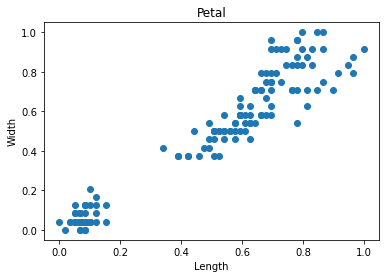

In [21]:
# Scatter plot of the scaled data
plt.scatter(df.Petal_Length_Scaled,df.Petal_Width_Scaled)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()


In [22]:
# Create model
km2 = KMeans(n_clusters=3)

# Do K-means clustering
ypredicted2= km2.fit_predict(df[['Petal_Length_Scaled','Petal_Width_Scaled']])

# Print estimated cluster of each scaled point in the dataset
ypredicted2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# Add a new column to the dataset with the cluster information
df['Cluster2'] = ypredicted2

df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1,Petal_Length_Scaled,Petal_Width_Scaled,Cluster2
0,5.1,3.5,1.4,0.2,0,0,0.067797,0.041667,1
1,4.9,3.0,1.4,0.2,0,0,0.067797,0.041667,1
2,4.7,3.2,1.3,0.2,0,0,0.050847,0.041667,1
3,4.6,3.1,1.5,0.2,0,0,0.084746,0.041667,1
4,5.0,3.6,1.4,0.2,0,0,0.067797,0.041667,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,0.711864,0.916667,2
146,6.3,2.5,5.0,1.9,2,1,0.677966,0.750000,2
147,6.5,3.0,5.2,2.0,2,1,0.711864,0.791667,2
148,6.2,3.4,5.4,2.3,2,1,0.745763,0.916667,2


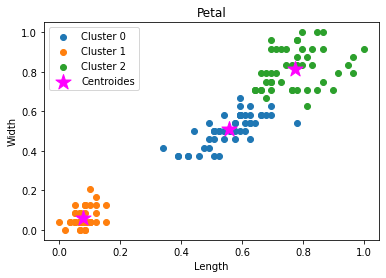

In [24]:
# Get dataframes for each estimated cluster
df1 = df[df.Cluster2==0]
df2 = df[df.Cluster2==1]
df3 = df[df.Cluster2==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length_Scaled, df1.Petal_Width_Scaled, Label='Cluster 0')
plt.scatter(df2.Petal_Length_Scaled, df2.Petal_Width_Scaled, Label='Cluster 1')
plt.scatter(df3.Petal_Length_Scaled, df3.Petal_Width_Scaled, Label='Cluster 2')

plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


# <span style='color:Blue'> Final remarks  </span>

- The number of each cluster is randomly assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k



# <span style='color:Blue'> Activity  </span>


1- AAA

